<div style="background:#f0f8ff; padding:14px; border-radius:6px">

<h2>I - Introduction</h2>

<p>
Ce notebook s’inscrit dans la continuité des travaux menés sur les modèles
Transformer appliqués à la classification de produits, avec un objectif
spécifique : <b>explorer une architecture complémentaire en vue d’une stratégie
de fusion de modèles</b>.
</p>

<p>
Après avoir identifié <b>CamemBERT-large avec prétraitement numtok light</b> comme
la meilleure configuration monomodèle, il est pertinent d’introduire un modèle
présentant des <b>biais inductifs différents</b> afin d’enrichir la diversité des
représentations exploitées lors du blending ou du stacking.
</p>

<p>
Dans cette optique, nous évaluons <b>XLM-RoBERTa-base</b>, un modèle
<b>multilingue</b> pré-entraîné sur un large corpus couvrant de nombreuses langues
et styles rédactionnels. Ce choix se justifie par trois facteurs principaux :
</p>

<ul>
<li>
<b>La langue</b> : contrairement à CamemBERT, spécialisé sur le français,
XLM-RoBERTa est exposé à une grande variété linguistique, ce qui le rend plus
robuste aux formulations atypiques, aux anglicismes et aux variations
lexicales présentes dans les descriptions de produits.
</li>
<li>
<b>La capacité du modèle</b> : en tant que modèle <i>base</i>, XLM-RoBERTa dispose
d’une capacité plus limitée que CamemBERT-large, induisant un compromis
différent entre généralisation et spécialisation, susceptible de produire des
erreurs complémentaires.
</li>
<li>
<b>Le prétraitement</b> : XLM-RoBERTa est entraîné sur le <b>texte brut</b>, sans
normalisation numérique spécifique, afin de conserver une représentation plus
directe et moins contrainte du contenu textuel, en contraste avec l’approche
numtok light adoptée pour CamemBERT.
</li>
</ul>

<p>
L’objectif de ce notebook est donc double : évaluer les performances propres de
XLM-RoBERTa-base sur la tâche de classification, et analyser son potentiel de
<b>complémentarité</b> avec CamemBERT-large en vue d’une fusion ultérieure des
prédictions.
</p>

</div>


In [1]:
import sys
sys.path.insert(0, '../src')
from data import load_data
from features.text import MergeTextTransformer, LanguageDetector
from utils import load_wandb_runs, load_wandb_history_df
from visualization import plot_classification_report, plot_f1_comparison_with_delta

from experiments.transformers_experiment import get_experiment_config, run_experiment

from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
config = get_experiment_config()
pd.DataFrame({"valeur":config.values()}, index=config.keys())

,valeur
max_length,384.00000
batch_size,64.00000
epochs,8.00000
mlp_dim,512.00000
learning_rate,0.00002
warmup_ratio,0.10000
early_stopping_patience,3.00000


In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = load_data(splitted=True).values()
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train.tolist())
y_val = encoder.transform(y_val.tolist())
y_test = encoder.transform(y_test.tolist())

In [ ]:
# le run fait ici

# run_experiment(model_name="xlm-roberta-base", preproc_name="text_brut", preprocessor=MergeTextTransformer(sep="[SEP]"), run_name="xlmr_raw_text", checkpoint_dir=checkpoint_dir, log_dir=log_dir, device=device)

In [ ]:
project_path = "beautiful-pixel-formation-data-science/ds_rakuten"
run_names = ["xlmr_raw_text"]
runs = load_wandb_runs(project_path, run_names)
history_df = load_wandb_history_df(runs)

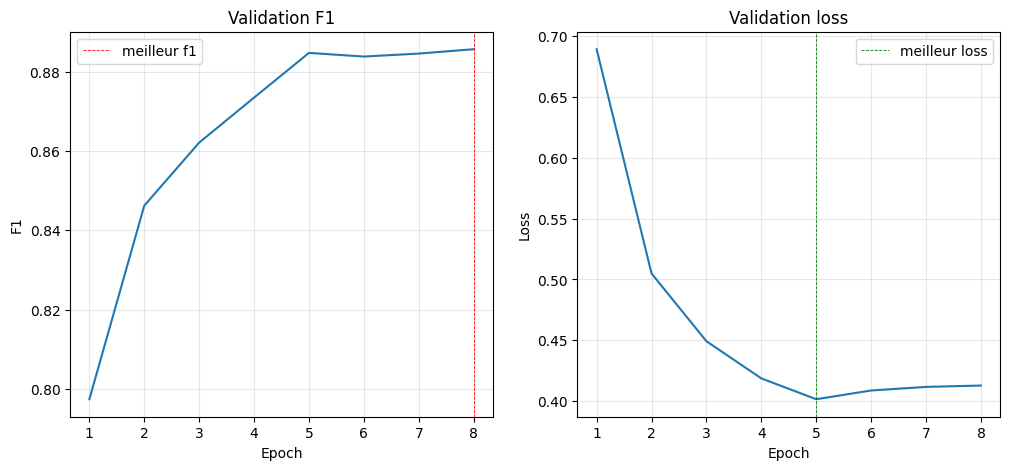

In [50]:
epoch_best_loss = history_df[history_df['val/loss'] == history_df['val/loss'].min()]['epoch'].values[0]
epoch_best_f1 = history_df[history_df['val/f1'] == history_df['val/f1'].max()]['epoch'].values[0]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(history_df['epoch'], history_df['val/f1'])
ax1.set_title("Validation F1")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("F1")
ax1.axvline(epoch_best_f1, linestyle='--', color='r', linewidth=0.6, label='meilleur f1')
ax1.grid(alpha=0.3)
ax1.legend()

ax2.plot(history_df['epoch'], history_df['val/loss'])
ax2.set_title("Validation loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.axvline(epoch_best_loss, linestyle='--', color='g', linewidth=0.6, label='meilleur loss')
ax2.grid(alpha=0.3)
ax2.legend()
plt.show()

In [56]:
history_df

,_step,epoch,train/loss,train/f1,val/loss,val/f1,name
0,0,1,1.648174,0.532768,0.689152,0.797373,xlmr_raw_text
1,1,2,0.595849,0.822661,0.504914,0.846220,xlmr_raw_text
2,2,3,0.426191,0.867993,0.449260,0.862135,xlmr_raw_text
3,3,4,0.320918,0.899569,0.418739,0.873488,xlmr_raw_text
4,4,5,0.246607,0.922592,0.401637,0.884780,xlmr_raw_text
5,5,6,0.188726,0.940632,0.408811,0.883851,xlmr_raw_text
6,6,7,0.153961,0.952239,0.411763,0.884605,xlmr_raw_text
7,7,8,0.137801,0.957683,0.412872,0.885703,xlmr_raw_text


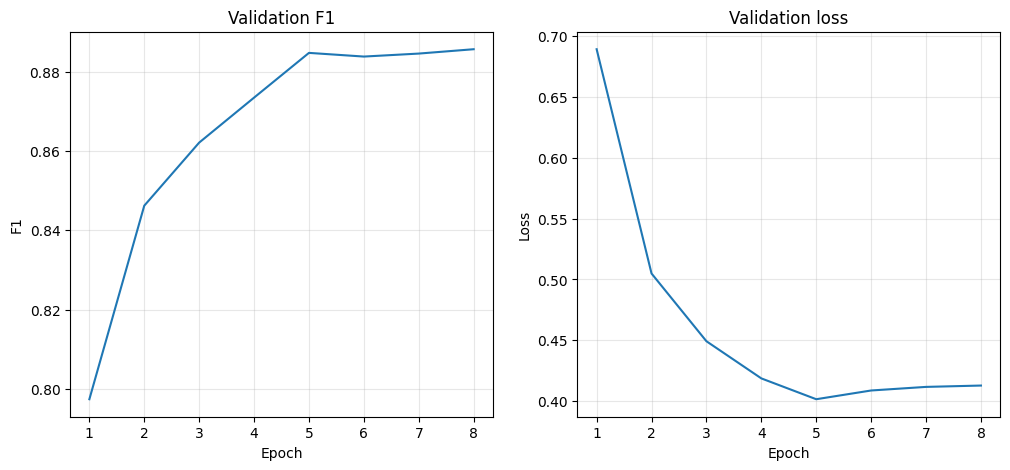

In [5]:


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
ax1.plot(history_df['epoch'], history_df['val/f1'])
ax1.set_title("Validation F1")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("F1")
ax1.grid(alpha=0.3)

ax2.plot(history_df['epoch'], history_df['val/loss'])
ax2.set_title("Validation loss")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.grid(alpha=0.3)
plt.show()


<div style="background:#f0f8ff; padding:14px; border-radius:6px">

<p>
L’analyse des courbes d’apprentissage présentées dans ce notebook met en évidence
un comportement stable du modèle <b>XLM-R</b>. À partir de l’epoch 5, le F1-score de
validation atteint un <b>plateau</b>, tandis que la loss de validation cesse de
diminuer et remonte légèrement.
</p>

<p>
Cela suggère que les epochs supplémentaires n’apportent plus de gain significatif
en termes de performance globale, et qu’elles correspondent principalement à des
ajustements marginaux de la décision, sans amélioration de la
<b>qualité des probabilités prédites</b>.
</p>

<h2>III - Analyse FR / non-FR</h2>

<p>
Afin d’analyser plus finement l’impact de la durée d’entraînement, les
probabilités prédites aux epochs 5 (meilleure loss) et 8 (meilleur F1-score) ont
été conservées. L’objectif est d’évaluer si un entraînement plus long conduit à
une spécialisation excessive du modèle sur les textes français, alors que
l’intérêt principal de <b>XLM-R</b> réside dans sa capacité à traiter des textes
non francophones dans une perspective de fusion de modèles.
</p>

<p>
Les performances sont ainsi comparées en termes de <b>F1-score pondéré</b> et de
<b>log loss</b> sur deux sous-ensembles du jeu de validation : les textes détectés
comme français et les autres textes (incluant les cas où la langue n’a pas pu être
identifiée).
</p>

<p>
Pour référence, les mêmes métriques sont également reportées pour
<b>CamemBERT-large</b> sur ces sous-ensembles. Dans ce cas, le modèle retenu
correspond à l’epoch présentant le meilleur F1-score, conformément au choix fait
précédemment (voir <i>text_05_xxx</i>), ce modèle servant de base principale dans
l’approche globale.
</p>

</div>


In [64]:
# proba = {
#     'camembert': np.load("../predictions/text/proba_camembert_val.npy"),
#     'xlmr (epoch 5)' : np.load("../predictions/text/proba_xlmr_best_loss_val.npy"),
#     'xlmr (epoch 8)' : np.load("../predictions/text/proba_xlmr_best_f1_val.npy")
# }

# df_lang = LanguageDetector().transform(X_val)
# mask_fr = df_lang['txt_fr'] == 1

masks = {
    'fr' : df_lang['txt_fr'] == 1,
    'non fr' : df_lang['txt_fr'] != 1
}

rows = []
for subset, m in masks.items():
    for model, pr in proba.items():
        rows.append({
            "subset": subset,
            "model": model,
            "f1_weighted": f1_score(y_val[m], np.argmax(pr, axis=1)[m], average="weighted"),
            "log_loss": log_loss(y_val[m], pr[m])
        })

pd.DataFrame(rows).round(3)

,subset,model,f1_weighted,log_loss
0,fr,camembert,0.917,0.368
1,fr,xlmr (epoch 5),0.894,0.364
2,fr,xlmr (epoch 8),0.895,0.373
3,non fr,camembert,0.889,0.543
4,non fr,xlmr (epoch 5),0.855,0.535
5,non fr,xlmr (epoch 8),0.856,0.555


<div style="background:#f0f8ff; padding:14px; border-radius:6px">

<p>
Les résultats obtenus montrent que les différences de <b>F1-score</b> entre les
configurations du modèle <b>XLM-R</b> restent limitées. Les performances sont
globalement inférieures à celles de <b>CamemBERT-large</b>, et l’écart entre l’epoch
5 et l’epoch 8 est marginal (environ 0,1 point de F1).
</p>

<p>
En revanche, l’analyse de la <b>log loss</b> apporte un éclairage plus intéressant,
en particulier sur les textes <b>non français</b>. À l’epoch 5, la log loss de
XLM-R sur ces données est sensiblement plus faible que celle observée pour
CamemBERT-large, indiquant des prédictions <b>plus confiantes et mieux calibrées</b>.
</p>

<p>
Cette propriété se dégrade fortement lorsque l’entraînement est prolongé jusqu’à
l’epoch 8, avec une augmentation marquée de la log loss sur les textes non
français, bien plus prononcée que sur les textes français. Ce comportement
suggère une spécialisation progressive du modèle sur les données francophones,
au détriment de sa capacité de généralisation multilingue.
</p>

<p>
Dans ce contexte, le modèle <b>XLM-R</b> enregistré à l’epoch 5 apparaît comme un
<b>candidat pertinent pour une stratégie de fusion</b>. Bien qu’il ne surpasse pas
<b>CamemBERT-large</b> en termes de F1-score global, il produit des
<b>probabilités plus stables et mieux calibrées sur les textes non français</b>.
</p>

<p>
Cette complémentarité justifie son intégration comme <b>modèle secondaire</b>
dans l’approche globale, l’objectif n’étant pas de remplacer le modèle principal
mais d’enrichir la décision finale via des signaux probabilistes différents.
</p>

</div>

<div style="background:#f0f8ff; padding:14px; border-radius:6px">

<h2>IV - Évaluation sur le jeu de test</h2>

<p>
Nous procédons maintenant à l’évaluation du modèle <b>XLM-R</b> retenu
(<i>epoch 5</i>) sur le jeu de test indépendant. Les probabilités associées ont été
préalablement enregistrées afin de permettre une analyse détaillée des scores
globaux et par catégorie, ainsi qu’une comparaison directe avec
<b>CamemBERT-large</b>.
</p>

</div>

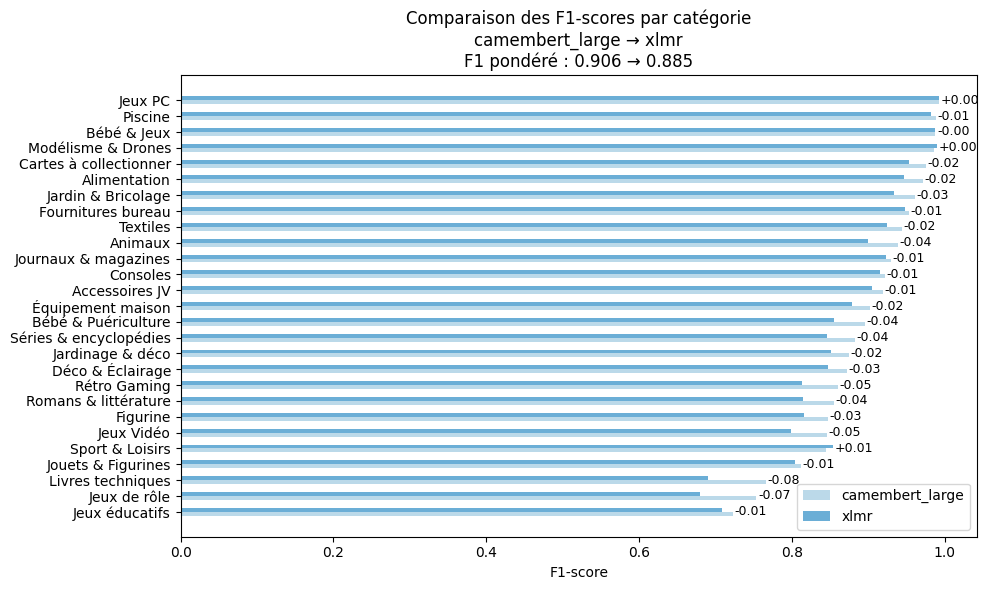

In [72]:
y_proba_cam = np.load("../predictions/text/proba_camembert_test.npy")
y_pred_cam = np.argmax(y_proba_cam, axis=1)
y_proba_xlmr = np.load("../predictions/text/proba_xlmr_best_loss_test.npy")
y_pred_xlmr = np.argmax(y_proba_xlmr, axis=1)

plot_f1_comparison_with_delta(y_test, y_pred_xlmr, y_pred_cam, ref_name='camembert_large', new_name='xlmr', encoder=encoder)

<div style="background:#f0f8ff; padding:14px; border-radius:6px">
<p> L’analyse par catégorie montre qu’une seule classe présente un gain net de F1-score en faveur du modèle multilingue, à savoir <b>Sport &amp; Loisirs</b> (<b>+1 point de F1</b>). </p> <p> Cette catégorie regroupe des produits très hétérogènes, souvent décrits à l’aide de <b>marques internationales</b>, de <b>terminologies techniques</b> et de <b>descriptions partiellement non francisées</b>. Dans ce contexte, l’exposition multilingue de <b>XLM-R</b> peut faciliter une meilleure généralisation sur certains sous-cas spécifiques. </p> <p> Néanmoins, ce gain reste <b>isolé et modéré</b> et ne compense pas les baisses observées sur la majorité des autres catégories. Il confirme surtout que l’apport de <b>XLM-R</b> est <b>local et complémentaire</b>, plutôt que globalement supérieur à <b>CamemBERT-large</b>. </p> </div>